# CLASSIFICATION dengan KKN (K Nearest Neighbours)

Sumber : 
- https://www.youtube.com/watch?v=4zARMcgc7hA&ab_channel=IndonesiaBelajar

## K Nearest Neighbours
- KKN merupakan sebuah model machine learning yang dapat digunakan untuk melakukan metode klasifikasi terhadap sekumpulan data berdasarkan pembelajaran data yang sudah terklasifikasikan sebelumnya. 
- KKN juga dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakterisik dengan sejumlah tetangga terdekat.
- Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.

## SAMPLE DATASET

Langkah pertama adalah mempersiapkan sample data set yang berisi daftar tinggi, berat badan dan jenis kelamin yang ditampung dalam format pandas data frame. 
- Mengimport modul pandas data frame
- Membuat variable sensus yang menampung data dictionary berisi daftar tinggi, berat badan dan jenis kelamin
- Data-data ini kemudian akan dibentuk menjadi pandas data frame, hasil data yang sudah dibentuk menjadi pandas data frame ini kemudian ditampung ke dalam variable 'sensus_df'

In [44]:
import pandas as pd

sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat': [64,86, 84, 80, 49, 59, 67, 54, 67],
    'gender': ['pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita',]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,gender
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


## VISUALISASI DATA 

Pada tahap ini, saya akan melakukan visualisasi data terhadap data sebelumnya ke dalam scatter plot. Dimana sumbu x akan berasosiasi dengan tinggi badan dan sumbu y akan berasosiasi dengan berat badan.

- Pertama, import modul maplotlibnya as plt
- Kemudian membentuk subplots dimana dapat menangkap object figure dan axesnya
- Kemudian looping data sensus tersebut, dimana 'sensus_df' di groupby berdasarkan 'gender'nya. 
- d ini akan berisi sekumpulan baris data dari kelompok jenis kelamin tertentu
- Memanggil ax.scatter dimana sumbu x berasosiasi dengan tinggi dan sumbu y  berasosiasi dengan berat badan. 

Pada plt.legend terdapat parameter loc yang berfungsi menentukan lokasi dari legendnya, saya membuat location legend ini di lower right, berarti posisinya di kanan bawah figure. 

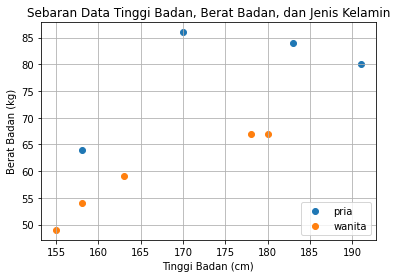

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for gender, d in sensus_df.groupby('gender'):
    ax.scatter(d['tinggi'], d['berat'],label=gender)
    
plt.legend(loc='lower right')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

# CLASSIFICATION dengan KKN

## PREPROCESSING DATASET

- Pada variable X_train berisi sekumpulan data tinggi dan berat badan dalam bentuk numpy array. X_train ini akan dijadikan sebagai sekumpulan features untuk training set.
- Pada variable y_train berisi sekumpulan data gender yang dikonversi ke dalam bentuk numpy array. y_train ini yang akan dijadikan sebagai sekumpulan target untuk training set.

Jika dilihat pada output kode dibawah ini, X_train sudah dalam bentuk format array 2 dimensi dan tipe datanya juga sudah dalam bentuk numerik. Hal ini berarti X_train ini sudah siap digunakan untuk proses training. Sedangkan tipe data untuk y_train adalah string, hal ini akan mengakibatkan adanya kendala nanti.

In [46]:
import numpy as np

X_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['gender'])

print(f'X_train:\n{X_train}\n')
print(f'y_train:{y_train}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train:['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


Oleh karena itu, saya akan mengkonversi y_train ke dalam tipe data numerik/numerik biner dengan menggunakan Label Binarizer.
- Pertama-tama, seperti biasa import terlebih dahulu Label Binarizer
- Kemudian bentuk objek LaberBinarizer, objek ini ditampung dalam variable 'lb'
- Kemudian lakukan transformasi data yang kemudian ditampung dalam variable y_train
Terdapat 2 nilai dari hasil output kode dibawah ini yaitu 0 dan 1.
- 0 merepresentasikan 'pria'
- 1 merepresentasikan 'wanita'

In [47]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


Pada tahap ini, saya akan memflattenkan y_train menjadi 1 dimensi saja. 

In [48]:
y_train = y_train.flatten()
print(f'y_train:{y_train}')

y_train:[0 0 0 0 1 1 1 1 1]


## TRAINING KKN CLASSIFICATION MODEL

- Pada tahap ini, import terlebih dahulu KNeighborsClassifiernya. 
- Parameter K berguna untuk menentukan jumlah tetangga terdekat yang akan dilibatkan untuk proses prediksi. Saya set parameter K = 3, yang berarti jumlah tetangga terdekatnya adalah 3
- Membentuk objek KNeighborsClassifier yang didalamnya terdapat parameter n_neighbors yang diberi nilai K, dan objek yang terbentuk ini ditampung ke dalam variabel 'model'
- Kemudian ditraining dengan memanfaatkan X_train dan y_train (model.fit)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## PREDIKSI JENIS KELAMIN

Setelah KKN Classifiernya sudah ditraining, maka dapat digunakan untuk memprediksi gender berdasarkan data tinggi badan dan berat badan. 
Untuk Scikit Learn, sekumpulan data feature yang bisa digunakan harus dalam format numpy array dengan ukuran 2 dimensi. Untuk baris akan berkolerasi dengan jumlah data sedangkan untuk kolom akan berkolerasi dengan jumlah featuresnya. 

In [50]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan,berat_badan]).reshape(1,-1)
X_new

array([[155,  70]])

In [51]:
y_new = model.predict(X_new)
y_new

array([1])

In [52]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

## VISUALISASI NEAREST NEIGHBOURS

Pada tahap ini,hal yang perlu dilakukan adalah memanggil subplots untuk mendapatkan objek figure dan axes. Kemudian menampilkan kembali data point dari dataset yang dimiliki. 

Jika kita lihat output dari kode dibawah ini, maka posisi marker misterius ini berada dekat 3 marker yaitu 1 marker biru (pria) dan 2 marker orange (wanita) sehingga dapat diprediksi bahwa marker misterius ini adalah wanita.

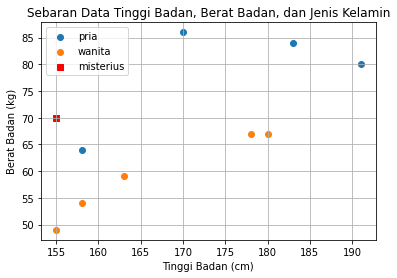

In [53]:
fig, ax = plt.subplots()
for gender, d in sensus_df.groupby('gender'):
    ax.scatter(d['tinggi'],d['berat'], label=gender)

plt.scatter(tinggi_badan,
           berat_badan,
           marker='s',
           color='red',
           label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

## KALKULASI DISTANCE (EUCLIDEAN DISTANCE)

Euclidean Distance adalah perhitungan jarak dari 2 buah titik dalam Euclidean space. Euclidean ini berkaitan dengan Teorema Phytagoras dan biasanya diterapkan pada 1, 2 dan 3 dimensi. Tapi juga sederhana jika diterapkan pada dimensi yang lebih tinggi.

Sumber : 
- https://blogs.itb.ac.id/anugraha/2014/09/10/teori-pengukuran-jarak/

In [54]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [55]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [56]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [57]:
sensus_df['jarak']= data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,gender,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


## EVALUASI KNN CLASSIFICATION MODEL

### TESTING SET

Menyiapkan testing set yang terdiri dari 4 data point. 
Pada X_test terdapat 4 baris dan 2 kolom sebagai features.
Pada y_test terdapat 4 buah data yang terdiri dari 2 pria dan 2 wanita sebagai target yang sudah ditransform ke tipe data numerik biner. Kemudian y_test ini di flattenkan untuk menjadi 1 dimensi saja. 

In [58]:
X_test = np.array([[168,65],[180,96],[160,52],[169,67]])
y_test = lb.transform(np.array(['pria','pria','wanita','wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:[0 0 1 1]


### PREDIKSI TERHADAP TESTING SET

Pada tahap ini adalah melakukan proses prediksi terhadap testing set dengan memanfaatkan KKN Classifier yang sudah ditraining sebelumnya.

In [59]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

## ACCURACY 

Accuracy adalah akurasi pada instance pada training test yang berhasil diprediksi secara tepat. 

**True positive** : sesuatu yang bernilai positif telah dengan tepat diprediksi sebagai positif oleh model. Contohnya adalah model sudah memprediksi secara tepat data pria sebagai pria, dan data wanita sebagai wanita.  

**True negative** : sesuatu yang bernilai negatif telah dengan tepat diprediksi sebagai negatif oleh model. Contohnya adalah model sudah memprediksi secara tepat data wanita sebagai bukan pria, dan data pria sebagai bukan wanita.

**False Positive**: sesuatu yang bernilai negatif telah keliru diprediksi sebagai positif oleh model. Contohnya adalah model sudah memprediksi secara keliru data wanita sebagai pria, dan data pria sebagai wanita.  

**False Negative** : sesuatu yang bernilai positif telah keliru diprediksi sebagai negatif oleh model.Contohnya adalah model sudah memprediksi secara keliru data pria sebagai bukan pria, dan data wanita sebagai bukan wanita. 

In [60]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy:{acc}')

Accuracy:0.75


## PRECISION

Precision adalah proporsi dari testing set yang diprediksi sebagai positif oleh model yang memang benar-benar positif.  

In [61]:
from sklearn.metrics import precision_score

prec = precision_score(y_test,y_pred)

print(f'Preccision:{prec}')

Preccision:0.6666666666666666


## RECALL

Recall adalah proporsi dari data pada testing test kita yang benar-benar positif yang diprediksi positif oleh model kita. 

In [62]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall:{rec}')

Recall:1.0


## F1 SCORE

F1 score adalah nilai rata-rata harmonic dari precision dan recall

In [63]:
from sklearn.metrics import f1_score

f1= f1_score(y_test, y_pred)

print(f'F1-score:{f1}')

F1-score:0.8


## CLASSIFICATION REPORT

In [64]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



## MATTHEWS CORRELATION COEFFIECIENT (MCC)

- MCC adalah alternatif untuk F1 score untuk keperluan pengumpulan performa dari binary classifier
- Nilai tertingginya adalah 1
- Kalo prediksinya dilakukan secara random/acak maka nilai scorenya adalah 0, atau model classifiernya benar-benar ngaco maka nilainya ada -1 
- Rentang nilainya dari -1 (kondisi terburuk) hingga 1 (kondisi terbaik) 

In [65]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC:{mcc}')

MCC:0.5773502691896258
